# Taller Evaluado de Aprendizaje No Supervisado


## Nombre Oscar Guajardo Menas
## ROL 201530016-K


# COVID 19

## Minería de Datos 2020

**Disclaimer**: Este taller utiliza datos oficiales del COVID-19, pandemia en curso que ha causado muchas y lamentables muertes a connacionales y en todo el mundo. El objetivo de trabajar con estos datos es mostrar la relevancia de las competencias del ramo para un mundo que toma decisiones importantes en base a la minería de datos. Sin embargo, *evite generarse opiniones o juicios en base a las conclusiones de este ejercicio*. Son los expertos en epidemiología, en salud pública, y los cientistas de datos que llevan decadas de experiencia los llamados a analizar estos datos con la debida seriedad que se merece la situación. Además, siempre recuerde que correlación (que analizamos aquí) no implica causalidad necesariamente.

### 1.- Selección y Descripción de Datos  

**1.1**- Descargue comma separated values ``comuna.csv`` del aula virtual (mismo lugar donde encontró este archivo). Este CSV contiene datos sobre la pandemia, y corresponden al Data Product 1 de la Mesa de Datos COVID-19 del Ministerio de Ciencia: https://github.com/MinCiencia/Datos-COVID19.


**PREGUNTA**: Escriba aquí en markdown una breve descripción de los datos que resuma la descripción que entrega el MinCiencia. ¿Cuáles features son númericos y cuáles categóricos?

**RESPUESTA** : El archivo comuna.csv contiene datos del ministerio de salud que entregan informacón con respecto al seguimiento de la pandemia ocasionada por el COVID-19. Este archivo tiene un formato de valores separados por coma (csv) que concatena historia de publicaciones de MINSAL sobre casos confirmados totales por comuna. Contiene las columnas 'Región', ‘Código Región’, 'Comuna', ‘Código comuna’, 'Población', múltiples columnas correspondientes a '[fecha]', y una columna 'Tasa'. Incluye versión con serie de tiempo. 

**1.2**- Cargue el archivo en un DataFrame pandas. 
* Elimine todos los samples (muestras) que tengan valores NaN (o impútelos si es valiente)
* Imprima las estadísticas básicas de su dataset (media, varianza, máximos y mínimos) y su cabecera y cola para verificar el contenido
* Imprima como ha variado la cantidad de casos en promedio por comuna con su respectivo intervalo de confianza (hint: fill_between)

In [2]:
import pandas as pd

df = pd.read_csv('comuna.csv')

df_nn = df.dropna()
df_nn


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,Tasa
0,Arica y Parinacota,15,Arica,15101,247552.0,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,166.0,224.0,270.0,297.0,310.0,125.2
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tarapacá,1,Alto Hospicio,1107,129999.0,0.0,0.0,0.0,5.0,6.0,10.0,14.0,15.0,16.0,27.0,39.0,55.0,77.0,128.0,98.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Magallanes,12,Punta Arenas,12101,141984.0,29.0,87.0,143.0,203.0,207.0,299.0,387.0,416.0,470.0,516.0,581.0,623.0,685.0,744.0,524.0
342,Magallanes,12,Rio Verde,12103,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,Magallanes,12,San Gregorio,12104,681.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,Magallanes,12,Timaukel,12303,282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_nn.head()


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,Tasa
0,Arica y Parinacota,15,Arica,15101,247552.0,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,166.0,224.0,270.0,297.0,310.0,125.2
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tarapacá,1,Alto Hospicio,1107,129999.0,0.0,0.0,0.0,5.0,6.0,10.0,14.0,15.0,16.0,27.0,39.0,55.0,77.0,128.0,98.5


In [20]:
df_nn.tail()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,Tasa
341,Magallanes,12,Punta Arenas,12101,141984.0,29.0,87.0,143.0,203.0,207.0,299.0,387.0,416.0,470.0,516.0,581.0,623.0,685.0,744.0,524.0
342,Magallanes,12,Rio Verde,12103,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,Magallanes,12,San Gregorio,12104,681.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,Magallanes,12,Timaukel,12303,282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,Magallanes,12,Torres del Paine,12402,1021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,97.9


In [22]:

df_nn.describe()

,Codigo region,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,Tasa
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,8.810496,9046.854227,56478.332362,5.647230,8.201166,10.230321,13.338192,15.376093,18.239067,21.740525,23.717201,26.807580,30.364431,35.489796,39.845481,49.381924,59.769679,64.424781
std,3.858113,3830.151230,89275.073876,19.022787,25.326241,31.163069,38.610091,42.978931,49.725104,56.616332,61.445396,69.212304,76.842047,88.705369,98.182382,120.704401,149.390485,104.985175
min,1.000000,1101.000000,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6109.500000,9535.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,5.200000
50%,8.000000,8314.000000,20071.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,6.000000,6.000000,27.700000
75%,13.000000,13103.500000,54824.500000,0.000000,5.000000,7.000000,9.000000,11.000000,12.000000,14.000000,14.500000,15.500000,19.500000,22.000000,22.500000,26.500000,31.000000,81.900000
max,16.000000,16305.000000,645909.000000,181.000000,225.000000,293.000000,365.000000,407.000000,443.000000,471.000000,506.000000,547.000000,605.000000,688.000000,764.000000,980.000000,1294.000000,958.100000


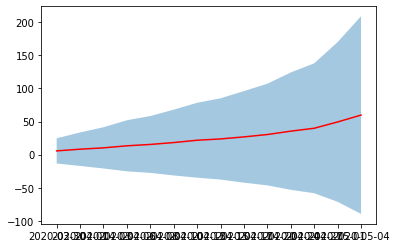

In [15]:
import matplotlib.pyplot as plt


df_comunas = df_nn.drop(columns =['Poblacion','Tasa','Codigo region','Codigo comuna'])
mean = df_comunas.mean()
var = df_comunas.std()

fig, ax = plt.subplots()
ax.plot( mean.index, mean , color='red')
ax.fill_between(mean.index, mean-var, mean + var, alpha=0.4)





**PREGUNTA**: ¿Qué significa que la varianza aumente? ¿Por qué usted cree que la media es un mal estimador en este caso?

**RESPUESTA** : Si la varianza aumenta, existe mayor diferencia de infectados confirmados por comuna a medida que el tiempo transcurre. Este indicador no es un buen estimador ya qué, la cantidad de habitantes por comuna varía enormemente.

**1.3**- Agrupe los datos por región e imprima las estadísticas (describe) de cada regíon *solo para las columnas referentes a los días*. Grafique la tendencia de contagios (x=días, y=contagios) por región.


In [33]:
region = df_nn.groupby(['Region'])
print(region.describe())

                   Codigo region                                           \
                           count  mean  std   min   25%   50%   75%   max   
Region                                                                      
Antofagasta                  9.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0   
Araucanía                   31.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0   
Arica y Parinacota           4.0  15.0  0.0  15.0  15.0  15.0  15.0  15.0   
Atacama                      9.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0   
Aysén                       10.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0   
Biobío                      32.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0   
Coquimbo                    15.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0   
Los Lagos                   30.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0   
Los Ríos                    12.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0   
Magallanes                  11.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227084BD3C8>,
      dtype=object)

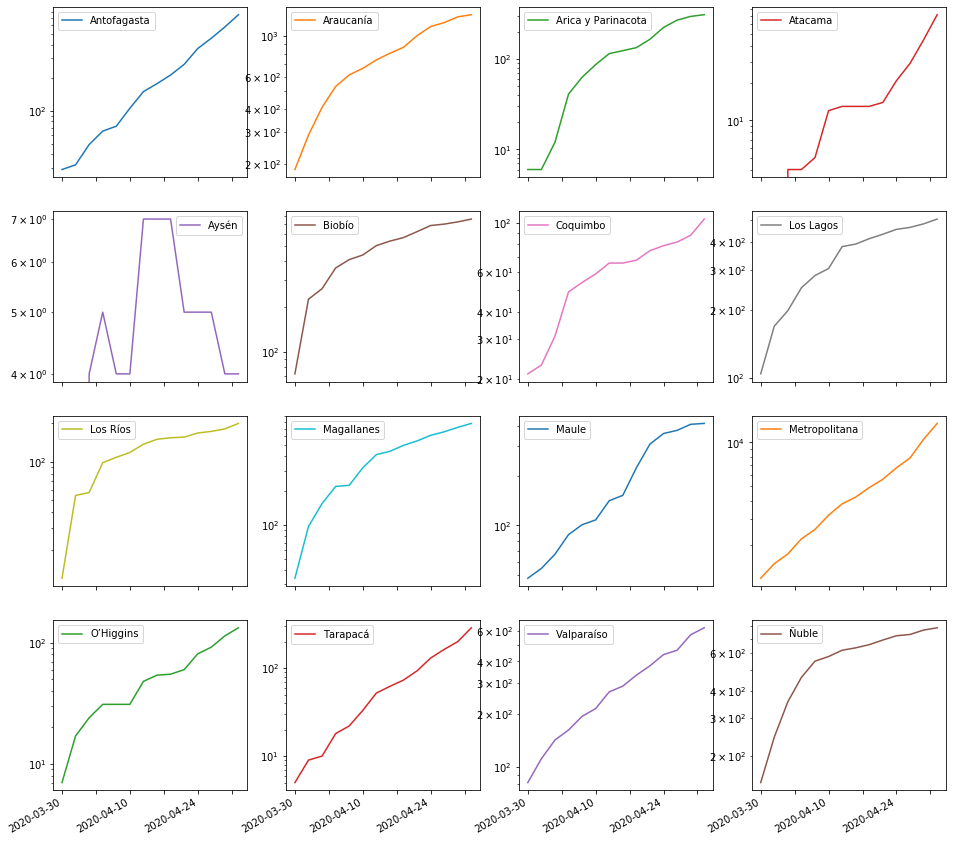

In [13]:
df_region = df_nn.drop(columns = ['Codigo region','Tasa','Comuna','Codigo comuna','Poblacion'])
df_region_sum = df_region.groupby('Region').sum().T
df_region_sum.plot(logy = True, subplots=True, layout = (4,4), figsize = (16,16))

**PREGUNTA**: ¿Tiene alguna conclusión usted respecto a las regiones? (hint: hay que aplicar escala logarítmica para visualizar datos exponenciales)

**Respuesta**: Al observar los gráficos es posible observar una tendencia al alza de los contagios en todas las regiones exceptuando la región de Aysen, por lo cual se espera que se existan cada vez más contagiados.

### 2- Reducción de Dimensionalidad y Visualización

**2.1**- Compute la matriz de correlaciones del DataFrame original (sólo valores numéricos) y presentela gráficamente como un mapa de calor. 

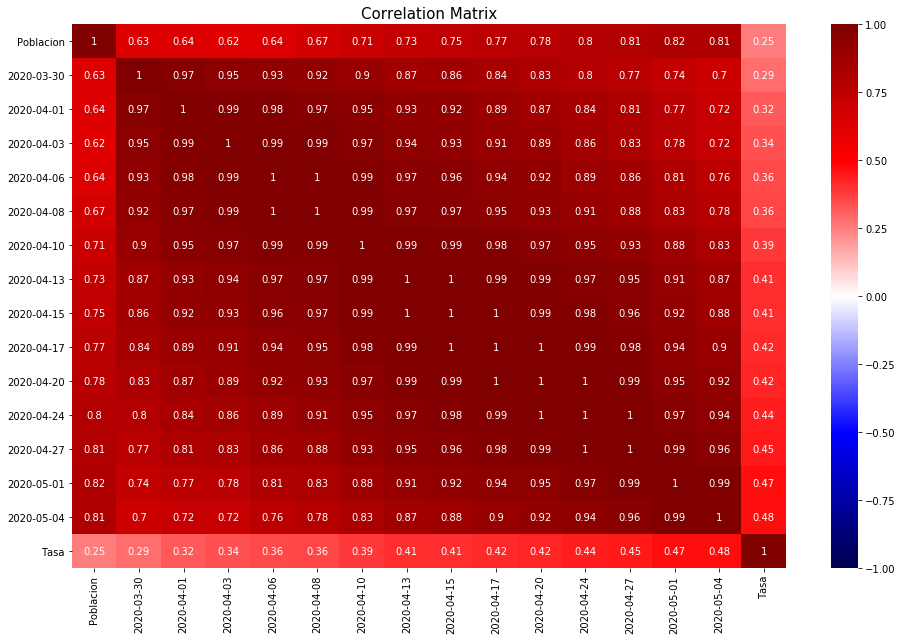

In [19]:
import seaborn as sns

def plot_corr_matrix (data,annot=True,s=(16,10)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    corr = data.corr()
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 15)
    plt.show()
    
df_corr = df_nn.drop(columns = ['Region','Comuna','Codigo region', 'Codigo comuna'])
plot_corr_matrix(df_corr)
    

**PREGUNTA**: ¿Qué estructura tiene la matriz? ¿Qué patrón general usted identifica? ¿Qué puede usted intuir respuesto a la columna de población?

**Respuesta**: Se puede apreciar una matrix triangular. En los extremos de la matriz los valores son cercanos al 0.7 y al adentrarse tienden a subir, llegando al 0.99.
    Al transcurso de los dias, la correlación aumenta puesto que la cantidad de contagiados aumenta.
    

**2.2**- Aplique el Análisis de Componentes Principales considerando 5 componentes. Grafique las proyecciones 2D de las 5 dimensiones PCA con la variable ``Region`` como descriptor de color de los puntos. Además, indique cuanto de la varianza se explica con estas 5 dimensiones y muestre la matriz de correlación de esas 5 dimensiones.

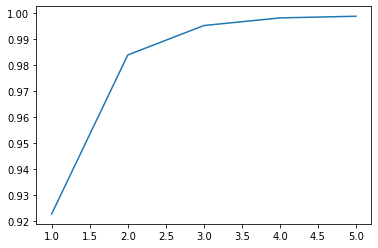

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np 

santab=df_region.drop('Region',axis= 1).astype(float)

scaler = StandardScaler().fit(santab)
stdtab = pd.DataFrame(scaler.transform(santab))
sklearn_pca = PCA(n_components=5,random_state=1)
xpca = sklearn_pca.fit_transform(stdtab)
varx=sklearn_pca.explained_variance_ratio_
plt.plot(np.arange(1,5+1),varx.cumsum())



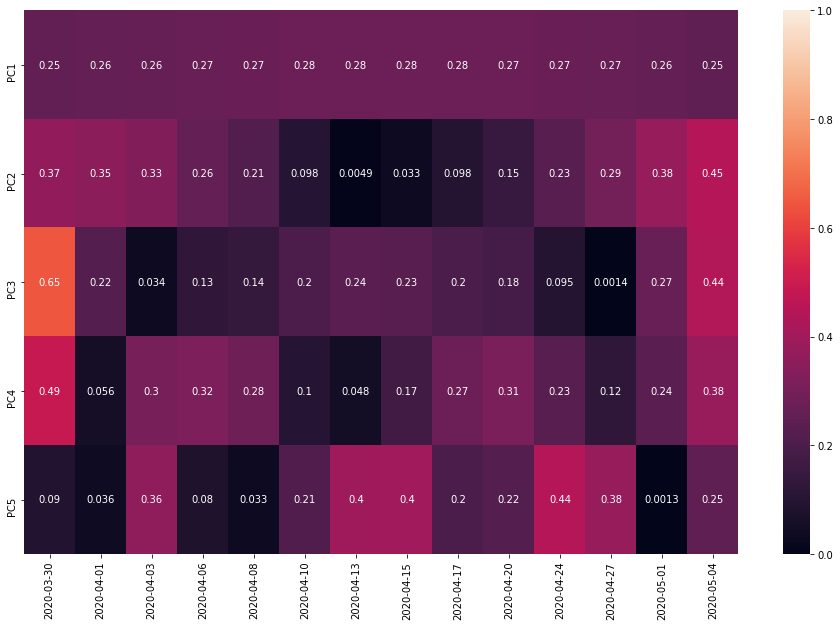

In [22]:
components = sklearn_pca.components_
ind=[]
for i in range(components.shape[0]):
    ind.append("PC"+str(i+1))
feature_weights= pd.DataFrame(np.abs(components),columns=santab.columns,index=ind)
fig= plt.figure(figsize=(16,10))
ax= fig.add_subplot(111)
ax = sns.heatmap(feature_weights,vmin=0,vmax=1, annot = True)

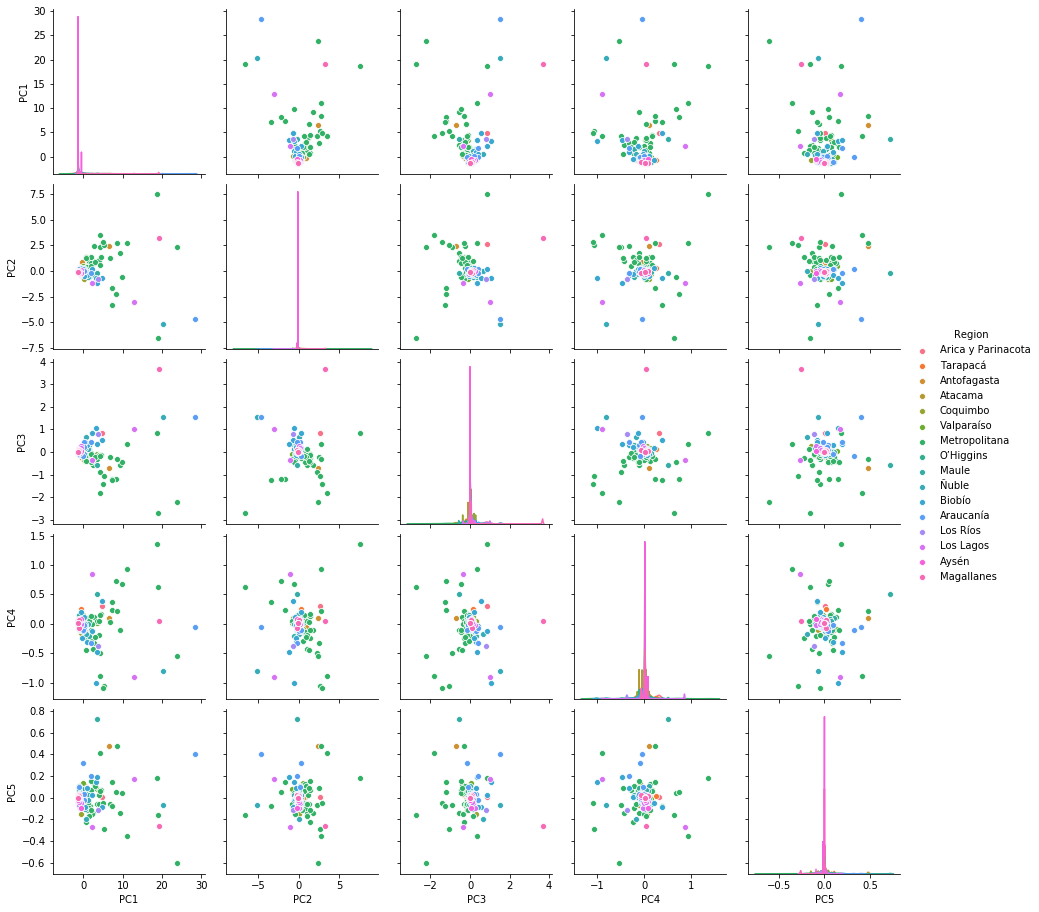

In [53]:
transtab = pd.DataFrame(xpca,columns=ind)
transtab["Region"] = df_nn["Region"]
sns.pairplot(transtab,diag_kind="kde", hue= "Region")

**PREGUNTA**: Ocupe estos 3 gráficos para argumentar lo pertinente de PCA en este caso.

**Respuesta** : En el primer gráfico es posible apreciar la similitud con la función logaritmica, por lo que es una representacion cercana de los datos.
 En el segundo gráfico, pertinente a la matriz de correlación con respecto a las nuevas componentes PCA, los días no tienen altos valores de correlación con las nuevas variables.
 En cuanto al pairplot, es dificil concluir algo.

### 3- Clustering 
**3.1** Aplique al menos dos algoritmos de clustering a las dimensiones salidas del PCA. Si el algoritmo lo requiere, fije la cantidad de clusters a 3. Grafique los restultados ocupando proyecciones a 2D con colores por cluster.

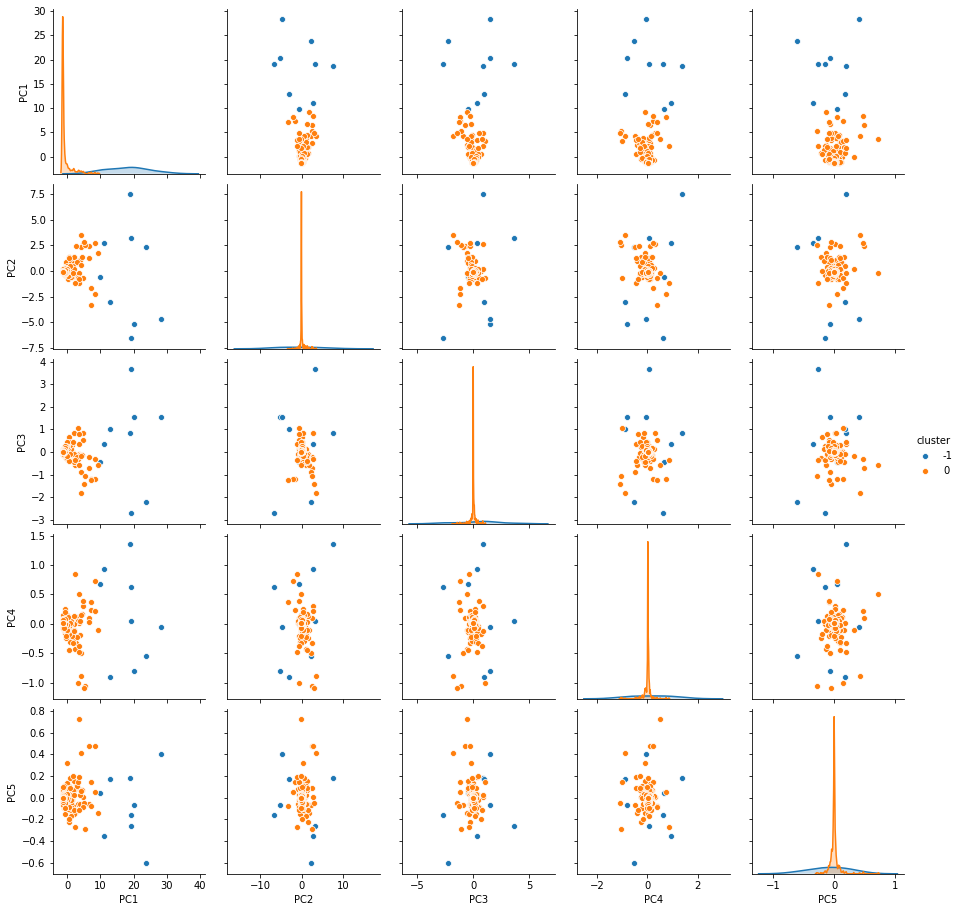

In [56]:
from sklearn.cluster import KMeans, DBSCAN
from ipywidgets import interact
rad = 5.0
db = DBSCAN(rad,min_samples=50).fit(xpca)  
transtab['cluster']=db.labels_
sns.pairplot(transtab,vars=ind, hue="cluster")

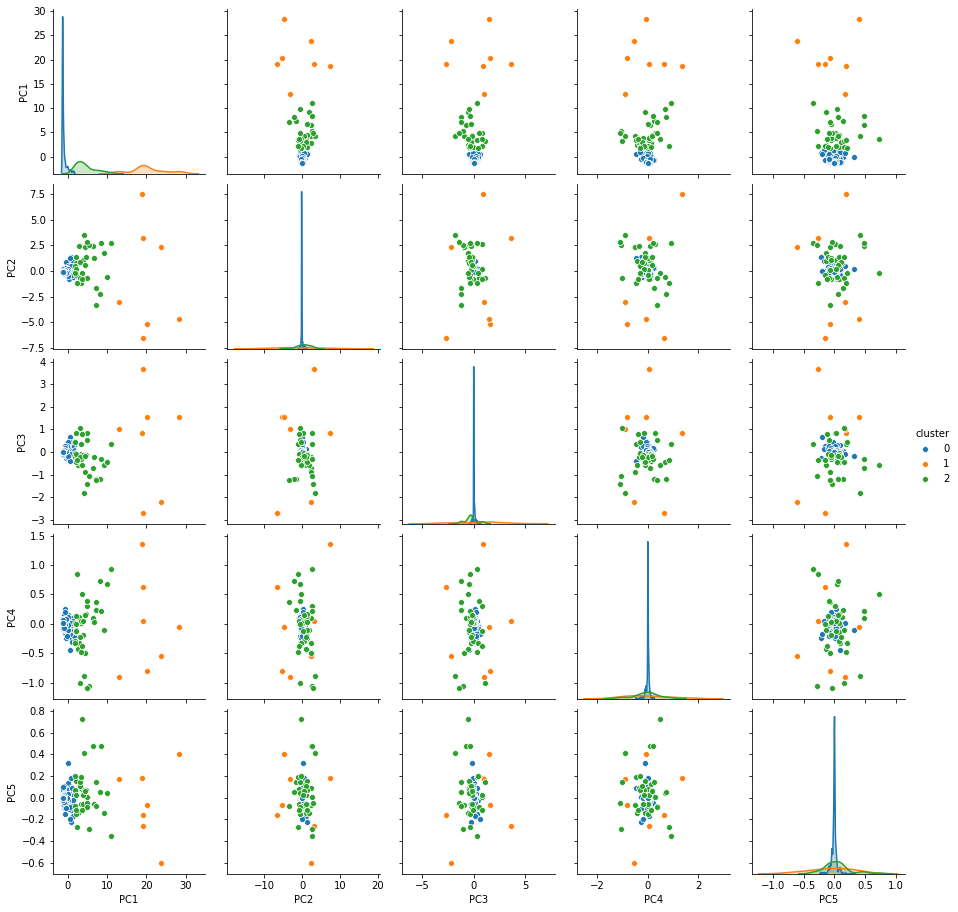

In [57]:
tclust = xpca 
km = KMeans(3).fit(tclust)
newtab = pd.DataFrame(tclust,columns=ind)
newtab['cluster'] = km.labels_
sns.pairplot(newtab, vars=ind, hue='cluster')

**PREGUNTA**: ¿Qué algoritmo se parece más adecuado cualitativamente? Seleccione este algoritmo para la siguiente pregunta. Tenga presente que comparar cuantitativamente clusters es complejo (muy posible!, pero aún no lo hemos visto).

**Respuesta**: Cualitativamente hablando, el algoritmo K-means puede representar de mejor manera la formación de los 3 clusters que se pueden observar en el gráfico.

**3.2** Revise cuales son y cambie fundadamente el/los parámetros del algoritmo.  (2 o 3 variaciones)

**PREGUNTA**: ¿Cuál es el mejor conjunto de parámetros? Jusitifque brevemente.

**3.3** Muestre las tablas con la información de los features y samples de cada cluster (máximo 3) utilizando el mejor conjunto de datos.

**PREGUNTA FINAL**: Ponga un nombre identificativo a los 3 clusters, y explique **muy** brevemente si correspondería o no tomar medidas diferenciadas para cada cluster.